In [1]:
# chipotle 데이터셋의 기초 정보 출력하기

# -*- coding: utf-8 -*-
# 이거 본인 코드 utf-8로 했다고 설명하는 건가..?
# html처럼..?
import pandas as pd

In [2]:
file_path = "../data/chipotle.tsv"
chipo = pd.read_csv(file_path, sep = "\t") # file_path를 불러온 다음 그것을 \t로 구분한 자료 = chipo

print(chipo.shape)
print("--------------------------------------------")
print(chipo.info())

(4622, 5)
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [3]:
# chipo라는 데이터 프레임에서 순서대로 10개의 데이터를 보여줍니다.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [4]:
print(chipo.columns)
print("-------------------------------------")
print(chipo.index) #index가 의미하는 것은 기본적으로 "일련번호". 즉, 행에 붙어있는 일련번호이고 행과 관련된 숫자값을 반환할 수밖에 없음

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
-------------------------------------
RangeIndex(start=0, stop=4622, step=1)


In [5]:
# describe() 함수로 기초 통계량 출력하기
# order_id는 숫자의 의미를 가지지 않기 때문에 str로 변환합니다. 
# describe()를 통해서 통계량을 낼텐데, 수치형 피처는 모두 통계를 내기 때문에 order_id를 str로 처리하지 않으면 일련번호의 통계값이 같이 등장할 것임
chipo["order_id"] = chipo["order_id"].astype(str)
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [6]:
# 범주형 피처에는 unique()사용
# unique() 함수로 범주형 피처의 개수 출력하기
print(len(chipo["order_id"].unique())) # 그냥 len만 사용하면 비어있는 셀까지 모두 count를 하는데, unique를 사용하면 object값이 있는 셀만 count함
print(len(chipo["item_name"].unique()))

1834
50


In [7]:
# 가장 많이 주문한 아이템 Top10을 분석하기 위해 DataFrame["column"]의 형태에 value_counts() 함수를 적용
# DataFrame["column"]은 시리즈라는 객체를 반환하는데, value_counts()는 오직 시리즈 객체에만 적용됨
# 가장 많이 주문한 아이템 Top10을 출력합니다.
item_count = chipo["item_name"].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(),1): # 이거 기억이 안난다...
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chicken Salad Bowl 110


In [8]:
# groupby() 함수를 이용하여 아이템별 주문 개수와 총량
# groupby() 함수는 데이터 프레임에서 특정 피처를 기준으로 그룹을 생성하며 이를 통해 그룹별 연산 적용 가능
# 아이템별 주문 개수를 계산합니다
order_count = chipo.groupby("item_name")["order_id"].count() # 해당 item_name이 등장한 횟수를 count함
order_count[:10] # 아이템별 주문개수를 오름차순 순서로 10번째까지 정렬하는 것
# 그래서 위에 있는 value_counts랑은 차이가 뭐냐? groupby() count가 높은 값부터 출력하는 게 아니라, 글자 순서대로 출력함

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [9]:
# 아이템별 주문 총량을 계산합니다.
item_quantity = chipo.groupby("item_name")["quantity"].sum() # 해당 item_name의 quantity 값을 모두 합친 것. 만약 sum이 아니라 count를 썼다면, 위와 같은 결과가 나옴
item_quantity[:10] # 주문 개수와 주문 총량은 무엇이 다른가..? 주문 개수는 한번에 여러개를 시킨 것을 가산하지 않음 가령 bowl 5개 --> 주문 1번
# 그러나 주문 총량은 bowl을 5개 시켰으면 그걸 있는 그대로 가산함

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

## 시각화

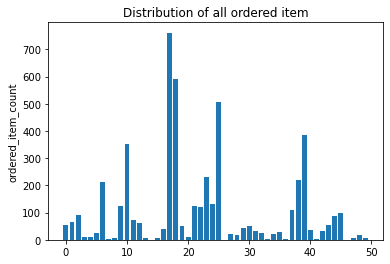

In [10]:
# tolist()와 넘파이의 arrange() 함수를 이용해 x_pos를 선언하고
# 0부터 50까지의 숫자를 그래프의 x축 이름으로 사용

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist() # item_quantity에 인덱스를 부여하고, 그것을 tolist()로 데이터화..? index를 붙이지 않아도 그래프는 만들어질걸?
x_pos = np.arange(len(item_name_list)) # x축에 들어가기 위해서는 numpy값이 되어야하는가?
order_cnt = item_quantity.values.tolist() # item_quantity에 해당하는 값을 tolist()로 데이터화

plt.bar(x_pos, order_cnt, align = "center")
plt.ylabel("ordered_item_count")
plt.title("Distribution of all ordered item")

plt.show()

### `미니퀴즈 1-1`
- `판다스에서 유용하게 사용하는 함수 value_counts()와 unique()의 차이점은 무엇일까요?`
    - 각 함수는 어떤 데이터 타입에 적용이 되는지, 어떤 기능을 가지고 있는지, 정확히 어떤 결과값을 반환하는지 실행해봅시다

In [11]:
print(chipo['item_name'].value_counts()[:10]) # 기본적으로 두개의 값을 가짐. 기준이 되는 feature값과, 그 feature값이 몇개인지 count

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Chips                  211
Steak Bowl             211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64


In [12]:
print(type(chipo['item_name'].value_counts())) # value_counts() 를 통해 나오는 값은 결국 Series값!

<class 'pandas.core.series.Series'>


In [13]:
print(chipo['item_name'].unique()[:10])

['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos']


In [14]:
print(type(chipo['item_name'].unique())) #unique()를 통해서 나오는 것은 array값

<class 'numpy.ndarray'>


# 데이터 전처리: 전처리 함수 사용하기

In [15]:
print(chipo.info())
print("----------------------------------")
chipo["item_price"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
----------------------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

- "$" 기호를 제거하는 전처리 방법은 chipo\["item_price"\]에 apply() 함수를 적용함으로써 가능합니다.
- apply() 함수에는 lambda라는 함수 명령어 추가

In [16]:
# column 단위 데이터에 apply() 함수로 전처리를 적용합니다
chipo["item_price"] = chipo["item_price"].apply(lambda x: float(x[1:])) # item_price에 lambda 함수를 apply할 건데, 그 lambda함수의 내용은 1번째 인덱스부터 float 값으로 바꾸는 것이다.
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


# 스무고개로 개념적 탐색 분석하기
데이터와 '스무고개'놀이를 하는 과정

In [17]:
# order_id로 그룹을 생성한  뒤, item_price 피처에 sum()함수를 적용하고 mean()함수를 추가함
# 주문당 평균 계산금액 도출
chipo.groupby("order_id")["item_price"].sum().mean()

18.811428571428717

In [19]:
# 한 주문에 10달러 이상 지불한 주문 찾아보기
chipo_orderid_group = chipo.groupby("order_id").sum() # groupby()는 특정 피처를 기준으로 같은 값을 가지고 있는 항목끼리 묶어줌, 여기에 sum()을 했으니 해당 그룹의 수치형 피처들을 모두 더해주는 것! 
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]
print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


chipotle 데이터셋에서는 주어진 데이터만으로 각 아이템의 가격을 대략적으로 유추해야함
- 1. chipo\[chipo.quantity == 1\]으로 동일 아이템을 1개만 구매한 주문을 선별
- 2. item_name을 기준으로 groupby 연산을 수행한뒤, min()함수로 각 그룹별 최저가를 계산
- 3. item_price를 기준으로 정렬하는 sort_values() 함수를 적용

In [20]:
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby("item_name").min() # 사실 price값만을 도출하는 변수는 아님!
# min이 필요한 이유: 같은 제품을 시켰어도 조합에 따라서 토핑에 따라서 가격이 올라갈 수도 있음!.. 아마도 최저가가 가장 아무것도 안 추가된 제품..?
price_per_item.sort_values(by = "item_price", ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


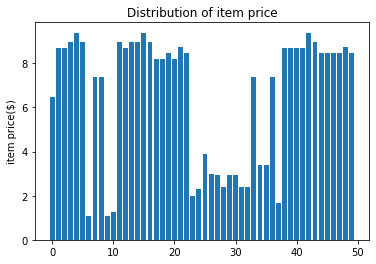

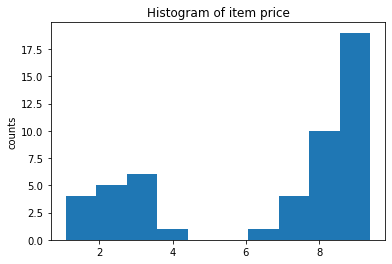

In [21]:
# 아이템 가격 분포 그래프를  출력합니다
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item["item_price"].tolist() # 그래프의 값으로 들어가기 위해서는 무조건 tolist() 사용?

plt.bar(x_pos, item_price, align="center")
plt.ylabel("item price($)")
plt.title("Distribution of item price")
plt.show()

# 아이템 가격 히스토그램을 출력합니다
plt.hist(item_price)
plt.ylabel("counts")
plt.title("Histogram of item price") # 히스토그램은 위의 막대그래프와는 다르게, 같은 값이 몇개인지를 count해주는 기능이 있음
plt.show()

In [22]:
# 가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지를 계산합니다
chipo.groupby("order_id").sum().sort_values(by = "item_price", ascending = False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


In [24]:
# "Veggie Salad Bowl"이 몇 번 주문되었는지를 계산합니다
chipo_salad = chipo[chipo["item_name"] == "Veggie Salad Bowl"]
# 한 주문 내에서 중복 집계된 item_name을 제거합니다
# 한 주문 내에서 item_name이 중복 집계될 수 있는가???? 똑같은 제품을 여러개 시켜도 item_name이 여러번 등장하는게 아니라 quantity만 늘어나는데?
# item_name은 같지만 토핑이나 조합이 다른 경우, item_name이 여러번 출력됨
chipo_salad = chipo_salad.drop_duplicates(['item_name', "order_id"]) # item_name과 order_id가 동시에 중복되는 값이 있을 경우 제외!

print(len(chipo_salad))
chipo_salad.head()

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [25]:
# "Chicken Bowl"을 2개 이상 주문한 횟수를 구합니다
chipo_chicken = chipo[chipo["item_name"] == "Chicken Bowl"]
chipo_chicken_result = chipo_chicken[chipo_chicken["quantity"] >= 2]
print(chipo_chicken_result.shape[0])

33


In [26]:
# “Chicken Bowl”을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량을 구합니다.
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity'] # quantity가 2이상인 것을 구한게 아니라, 이러한 방식으로 하면 토핑이 달라도 2이상인 값들을 구할 수 있음
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64